# Introduction

In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance.

The goal of this project is to scope, prep, analyze, and create a machine learning model to solve a question.

Data sources:

profiles.csv was provided by Codecademy.com.

# Scoping

It's beneficial to create a project scope whenever a new project is being started. Below are four sections to help guide the project process and progress. The first section is the project goals, a section to define the high-level objectives and set the intentions for this project. The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and aligning the question(s) with the project goals. Lastly, evaluation will help build conclusions and findings from the analysis.

# Project goals

The primary objective of this project is to practice formulating questions and implementing machine learning techniques to answer those questions. The specific research question that will be addressed is whether it's possible to predict an OkCupid user's signs using other variables from their profile. This project is significant and for sure is very difficult to approach to an convicend score in order to have a predictive model, but I can learn a lot trying to reach the target.

# Data

The project will use one dataset provided by Codecademy called profiles.csv. The data comprises user profiles, with each row representing an OkCupid user and the columns consisting of their responses to multi-choice and short answer questions.

# Analysis

To understand the distribution, count, and relationship between variables, descriptive statistics and data visualization will be used. Since the project's primary goal is to make predictions about users' astrological signs, supervised learning machine learning models' classification algorithms will be used.

# Evaluation

At the conclusion of the project, the machine learning model will be evaluated using a validation dataset. A confusion matrix and metrics such as accuracy, precision, recall, and F1 scores can be used to verify the predictions' output.

# Load and Check Data

Before proceeding with supervised learning, it is important to verify that the data has a label or response variable. Without a label or response variable, the data cannot be used for supervised learning, and an alternative approach may need to be considered. If the data is missing a crucial piece for analysis, it may be necessary to go back to the previous step and select a different problem to solve that has complete and relevant data.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('profiles.csv')


# to know some...

In [12]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [6]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

# I proceed to see which are the NaN data on the DataFrame

I need to visualize the importance of them in oder to delete the rows or if ist's better to do something with it as converting in strings or tryng to make a prediction with them..

In [16]:
print(f" Porcentaje %: \n \n{((df.isnull().sum())/len(df)).sort_values(ascending = False) * 100}")

 Porcentaje %: 
 
offspring      59.321723
diet           40.694959
religion       33.740366
pets           33.231575
essay8         32.070530
drugs          23.487806
essay6         22.972342
essay9         21.023922
essay7         20.770360
essay3         19.143896
sign           18.443266
essay5         18.099623
essay4         17.577486
essay2         16.077803
job            13.675641
essay1         12.631368
education      11.056618
ethnicity       9.475194
smokes          9.194942
essay0          9.154906
body_type       8.834618
drinks          4.979482
speaks          0.083408
height          0.005005
sex             0.000000
age             0.000000
orientation     0.000000
location        0.000000
last_online     0.000000
income          0.000000
status          0.000000
dtype: float64


# Now, let's  check it out the differents variables and future category data :

In [8]:
df.pets.value_counts()

pets
likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: count, dtype: int64

In [9]:
df.education.value_counts(normalize = True)

education
graduated from college/university    0.449360
graduated from masters program       0.168067
working on college/university        0.107131
working on masters program           0.031565
graduated from two-year college      0.028715
graduated from high school           0.026783
graduated from ph.d program          0.023857
graduated from law school            0.021044
working on two-year college          0.020143
dropped out of college/university    0.018662
working on ph.d program              0.018437
college/university                   0.015023
graduated from space camp            0.012322
dropped out of space camp            0.009809
graduated from med school            0.008365
working on space camp                0.008346
working on law school                0.005045
two-year college                     0.004164
working on med school                0.003976
dropped out of two-year college      0.003582
dropped out of masters program       0.002626
masters program         

In [10]:
print(df.religion.value_counts())

religion
agnosticism                                   2724
other                                         2691
agnosticism but not too serious about it      2636
agnosticism and laughing about it             2496
catholicism but not too serious about it      2318
atheism                                       2175
other and laughing about it                   2119
atheism and laughing about it                 2074
christianity                                  1957
christianity but not too serious about it     1952
other but not too serious about it            1554
judaism but not too serious about it          1517
atheism but not too serious about it          1318
catholicism                                   1064
christianity and somewhat serious about it     927
atheism and somewhat serious about it          848
other and somewhat serious about it            846
catholicism and laughing about it              726
judaism and laughing about it                  681
buddhism but not too s

In [11]:
df.speaks.value_counts()

speaks
english                                                                21828
english (fluently)                                                      6628
english (fluently), spanish (poorly)                                    2059
english (fluently), spanish (okay)                                      1917
english (fluently), spanish (fluently)                                  1288
                                                                       ...  
english (fluently), urdu (poorly), japanese (poorly), french (okay)        1
english, spanish, hindi, c++                                               1
english (fluently), japanese (okay), thai (okay), chinese (poorly)         1
english (fluently), french (okay), italian (okay), hebrew (okay)           1
english (fluently), french, farsi                                          1
Name: count, Length: 7647, dtype: int64

# We are going to clean the data, create some new columns in order to create features to analize better

In [17]:
data_selected = ['body_type', 'diet', 'orientation', 'education', 'religion', 'sex', 'job', 'sign', 'pets', 'age', 'speaks']
df_clean = df[data_selected].dropna()
print(df_clean.isna().sum())
df_clean.shape

body_type      0
diet           0
orientation    0
education      0
religion       0
sex            0
job            0
sign           0
pets           0
age            0
speaks         0
dtype: int64


(15810, 11)

In [956]:
df_clean['sign_clean'] = df_clean.sign.apply(lambda x:x.split()[0])
df_clean['religion_clean'] = df_clean.religion.apply(lambda x:x.split()[0])

In [957]:
df_clean.head()

,body_type,diet,orientation,education,religion,sex,job,sign,pets,age,speaks,sign_clean,religion_clean
0,a little extra,strictly anything,straight,working on college/university,agnosticism and very serious about it,m,transportation,gemini,likes dogs and likes cats,22,english,gemini,agnosticism
1,average,mostly other,straight,working on space camp,agnosticism but not too serious about it,m,hospitality / travel,cancer,likes dogs and likes cats,35,"english (fluently), spanish (poorly), french (...",cancer,agnosticism
5,average,mostly anything,straight,graduated from college/university,atheism,m,computer / hardware / software,taurus,likes cats,29,"english (fluently), chinese (okay)",taurus,atheism
7,average,mostly anything,straight,graduated from college/university,christianity,f,artistic / musical / writer,sagittarius,likes dogs and likes cats,31,"english, spanish (okay)",sagittarius,christianity
9,athletic,mostly anything,straight,working on two-year college,atheism and laughing about it,m,student,cancer but it doesn&rsquo;t matter,likes dogs and likes cats,37,english (fluently),cancer,atheism


In [958]:
bins = [18, 25, 35, 45, 60, 120]
df_clean['category_age'] = pd.cut(df_clean.age, bins)

In [959]:
df_clean['speaks_count'] = df_clean['speaks'].apply(lambda x: (x.count(',')))
df_clean.head()

,body_type,diet,orientation,education,religion,sex,job,sign,pets,age,speaks,sign_clean,religion_clean,category_age,speaks_count
0,a little extra,strictly anything,straight,working on college/university,agnosticism and very serious about it,m,transportation,gemini,likes dogs and likes cats,22,english,gemini,agnosticism,"(18, 25]",0
1,average,mostly other,straight,working on space camp,agnosticism but not too serious about it,m,hospitality / travel,cancer,likes dogs and likes cats,35,"english (fluently), spanish (poorly), french (...",cancer,agnosticism,"(25, 35]",2
5,average,mostly anything,straight,graduated from college/university,atheism,m,computer / hardware / software,taurus,likes cats,29,"english (fluently), chinese (okay)",taurus,atheism,"(25, 35]",1
7,average,mostly anything,straight,graduated from college/university,christianity,f,artistic / musical / writer,sagittarius,likes dogs and likes cats,31,"english, spanish (okay)",sagittarius,christianity,"(25, 35]",1
9,athletic,mostly anything,straight,working on two-year college,atheism and laughing about it,m,student,cancer but it doesn&rsquo;t matter,likes dogs and likes cats,37,english (fluently),cancer,atheism,"(35, 45]",0


In [960]:
df_clean = df_clean.drop(columns = 'religion')
df_clean = df_clean.drop(columns = 'sign')


In [961]:
df_clean['education_clean'] = df_clean.education.apply(lambda x:x.split()[0])
df_clean.education_clean.value_counts()

education_clean
graduated             11193
working                3491
dropped                 841
college/university      172
two-year                 53
space                    24
high                     20
masters                  10
ph.d                      4
law                       1
med                       1
Name: count, dtype: int64

In [962]:
df_clean = df_clean.drop(columns = 'education')


In [963]:
df_clean.pets.value_counts()

pets
likes dogs and likes cats          6319
likes dogs                         2445
likes dogs and has cats            1787
has dogs                           1290
has dogs and likes cats            1034
likes dogs and dislikes cats        954
has dogs and has cats               598
has cats                            434
likes cats                          393
has dogs and dislikes cats          270
dislikes dogs and likes cats        110
dislikes dogs and dislikes cats      87
dislikes cats                        42
dislikes dogs and has cats           36
dislikes dogs                        11
Name: count, dtype: int64

In [964]:
like_dogs_and_cats = ['likes dogs and likes cats', 'likes dogs and has cats','has dogs and likes cats']
df_clean['like_dogs_and_cats'] = df_clean.pets.apply(lambda x: 1 if x in like_dogs_and_cats else 0)
df_clean.head()

,body_type,diet,orientation,sex,job,pets,age,speaks,sign_clean,religion_clean,category_age,speaks_count,education_clean,like_dogs_and_cats
0,a little extra,strictly anything,straight,m,transportation,likes dogs and likes cats,22,english,gemini,agnosticism,"(18, 25]",0,working,1
1,average,mostly other,straight,m,hospitality / travel,likes dogs and likes cats,35,"english (fluently), spanish (poorly), french (...",cancer,agnosticism,"(25, 35]",2,working,1
5,average,mostly anything,straight,m,computer / hardware / software,likes cats,29,"english (fluently), chinese (okay)",taurus,atheism,"(25, 35]",1,graduated,0
7,average,mostly anything,straight,f,artistic / musical / writer,likes dogs and likes cats,31,"english, spanish (okay)",sagittarius,christianity,"(25, 35]",1,graduated,1
9,athletic,mostly anything,straight,m,student,likes dogs and likes cats,37,english (fluently),cancer,atheism,"(35, 45]",0,working,1


In [965]:
df_clean.shape

(15810, 14)

# Preparing the model

In [966]:

X = df_clean.drop(columns = ['sign_clean'])
X_encoded = pd.get_dummies(X)
X_encoded.head()


,age,speaks_count,like_dogs_and_cats,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,...,education_clean_dropped,education_clean_graduated,education_clean_high,education_clean_law,education_clean_masters,education_clean_med,education_clean_ph.d,education_clean_space,education_clean_two-year,education_clean_working
0,22,0,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,35,2,1,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,29,1,0,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7,31,1,1,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
9,37,0,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [967]:
y = df_clean.sign_clean

In [968]:
X_array =X_encoded.values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_array, y_encoded, test_size = 0.25, random_state = 12)


In [969]:
knn_model = KNeighborsClassifier(n_neighbors = 7)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [970]:
print("KNN model score: ", knn_model.score(X_test,y_test))

KNN model score:  0.0796863141917531


# MODEL KNN

In [971]:
from sklearn.preprocessing import StandardScaler

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [973]:

from sklearn.model_selection import GridSearchCV

# Definir el modelo KNN
knn = KNeighborsClassifier()

# Definir la rejilla de hiperparámetros
param_grid = {
    'n_neighbors': [3, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean']
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Ajustar el GridSearchCV al conjunto de entrenamiento
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores hiperparámetros
print("Best parameters found: ", grid_search.best_params_)

# Evaluar el mejor modelo en el conjunto de prueba
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)
print("Accuracy with optimized parameters: ", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Accuracy with optimized parameters:  0.0789273969137364


In [974]:

# Evaluar el rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(cm)


Accuracy: 0.0789273969137364
[[48 42 39 21 20 35 26 21 19 18 15 18]
 [52 35 40 21 30 29 21 19 13 14  6 16]
 [51 59 39 12 35 42 20 21 25 19 12 18]
 [43 35 36 14 31 34 17 20 21 13 12 12]
 [61 61 41 27 35 39 25 26 23 15 15 19]
 [67 34 46 25 35 35 36 23 16 11  7 14]
 [52 46 43 20 28 36 26 20 19 16  7 16]
 [35 42 36 21 34 28 27 17 14 20 13 17]
 [21 47 41 27 36 35 24 23 20 25 12 25]
 [53 35 39 23 27 29 28 17 20 20 20 16]
 [48 43 32 27 31 39 22 19 14 20  5 16]
 [45 56 41 18 27 43 25 25 21 13 14 18]]


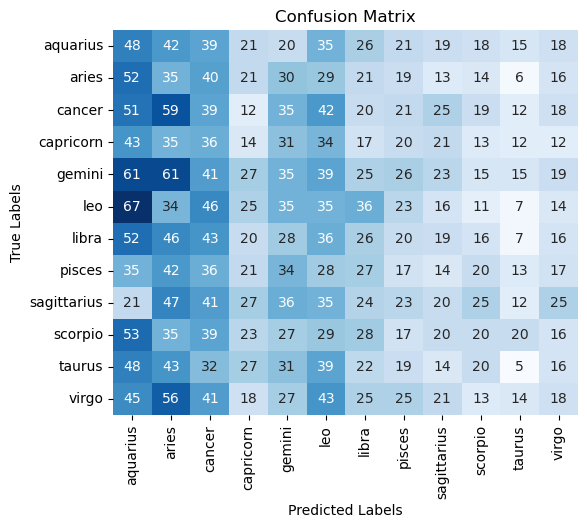

In [975]:
# Configurar la figura del mapa de calor
plt.figure(figsize=(6, 5))

# Crear el mapa de calor
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=le.classes_, yticklabels=le.classes_)

# Añadir etiquetas y título
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Mostrar el mapa de calor
plt.show()


# DecisionTreeClassifier

In [976]:
from sklearn.tree import DecisionTreeClassifier
tree_class = DecisionTreeClassifier()
tree_class.fit(X_train, y_train)

DecisionTreeClassifier()

In [977]:
from sklearn.metrics import classification_report


print("Score with DecisionTreeClassifier: ", tree_class.score(X_train, y_train))
y_pred= tree_class.predict(X_test)
classification_report_str = classification_report(y_test, y_pred)

# Mostrar el reporte de clasificación
print("Classification Report:\n", classification_report_str)

# Crear y mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Score with DecisionTreeClassifier:  0.998228894324028
Classification Report:
               precision    recall  f1-score   support

           0       0.04      0.04      0.04       322
           1       0.08      0.09      0.08       296
           2       0.07      0.06      0.06       353
           3       0.08      0.08      0.08       288
           4       0.11      0.10      0.10       387
           5       0.08      0.09      0.09       349
           6       0.08      0.09      0.08       329
           7       0.08      0.10      0.09       304
           8       0.06      0.05      0.05       336
           9       0.07      0.07      0.07       327
          10       0.08      0.08      0.08       316
          11       0.11      0.12      0.12       346

    accuracy                           0.08      3953
   macro avg       0.08      0.08      0.08      3953
weighted avg       0.08      0.08      0.08      3953

Confusion Matrix:
 [[12 34 40 24 22 24 33 32 18 31 24 2

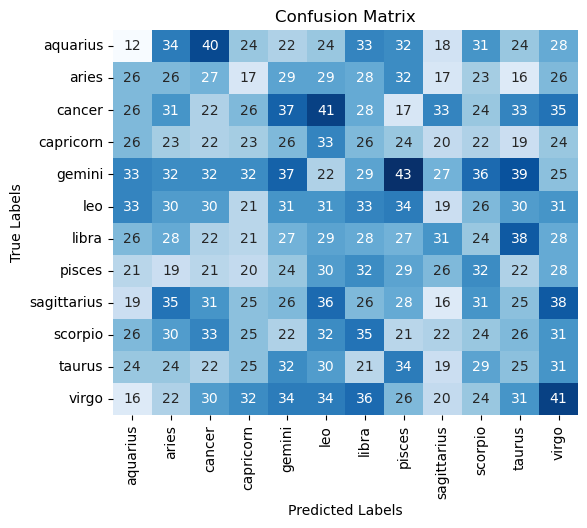

In [978]:
# Configurar la figura del mapa de calor
plt.figure(figsize=(6, 5))

# Crear el mapa de calor
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=le.classes_, yticklabels=le.classes_)

# Añadir etiquetas y título
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Mostrar el mapa de calor
plt.show()


In [980]:
# Obtener la importancia de las características del árbol de decisión
X_train_df = pd.DataFrame(X_train, columns=X_encoded.columns)


# Entrenar el modelo (suponiendo que estás usando un modelo de árbol de decisión)
from sklearn.tree import DecisionTreeClassifier
tree_class = DecisionTreeClassifier()
tree_class.fit(X_train_df, y_train)

# Obtener las importancias de las características
importances = tree_class.feature_importances_

# Crear un DataFrame con las características y sus importancias
feature_importances = pd.DataFrame({'Feature': X_train_df.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Mostrar las 10 características más importantes
print(feature_importances.head(10))


                             Feature  Importance
0                                age    0.120950
1                       speaks_count    0.037564
18              diet_mostly anything    0.025041
5                  body_type_average    0.022949
3167            religion_clean_other    0.021416
50                         job_other    0.020145
4                 body_type_athletic    0.019829
73    pets_likes dogs and likes cats    0.019359
37                             sex_m    0.017324
3162      religion_clean_catholicism    0.017105


In [981]:
# Asegurarse de que X_train y X_test sean DataFrames
X_train_df = pd.DataFrame(X_train, columns=X_encoded.columns)
X_test_df = pd.DataFrame(X_test, columns=X_encoded.columns)

# Seleccionar las características más importantes
important_features = feature_importances[feature_importances['Importance'] > 0.03]['Feature']
X_train_selected = X_train_df[important_features]
X_test_selected = X_test_df[important_features]

# Entrenar un nuevo modelo con las características seleccionadas
tree_class_selected = DecisionTreeClassifier(random_state=42)
tree_class_selected.fit(X_train_selected, y_train)
y_pred_selected = tree_class_selected.predict(X_test_selected)

# Evaluar el modelo con las características seleccionadas
print("Accuracy with selected features:", accuracy_score(y_test, y_pred_selected))


Accuracy with selected features: 0.0819630660258032


# Normalize data for NLP

In [982]:
df['essay0'] = df['essay0'].replace({'<br />': '\n', '\\n': '\n'}, regex=True)
df['essay0'] = df['essay0'].str.replace('\n',' ')
df['essay1'] = df['essay1'].replace({'<br />': '\n', '\\n': '\n'}, regex=True)
df['essay1'] = df['essay1'].str.replace('\n',' ')
df['essay2'] = df['essay2'].replace({'<br />': '\n', '\\n': '\n'}, regex=True)
df['essay2'] = df['essay2'].str.replace('\n',' ')
df['essay3'] = df['essay3'].replace({'<br />': '\n', '\\n': '\n'}, regex=True)
df['essay3'] = df['essay3'].str.replace('\n',' ')
df['essay4'] = df['essay4'].replace({'<br />': '\n', '\\n': '\n'}, regex=True)
df['essay4'] = df['essay4'].str.replace('\n',' ')
df['essay5'] = df['essay5'].replace({'<br />': '\n', '\\n': '\n'}, regex=True)
df['essay5'] = df['essay5'].str.replace('\n',' ')
df['essay6'] = df['essay6'].replace({'<br />': '\n', '\\n': '\n'}, regex=True)
df['essay6'] = df['essay6'].str.replace('\n',' ')
df['essay7'] = df['essay7'].replace({'<br />': '\n', '\\n': '\n'}, regex=True)
df['essay7'] = df['essay7'].str.replace('\n',' ')
df['essay8'] = df['essay8'].replace({'<br />': '\n', '\\n': '\n'}, regex=True)
df['essay8'] = df['essay8'].str.replace('\n',' ')


In [983]:
print(df.essay0[2], '\n')
print(df.essay1[2], '\n')
print(df.essay2[2], '\n')
print(df.essay3[2], '\n')
print(df.essay4[2], '\n')


i'm not ashamed of much, but writing public text on an online dating site makes me pleasantly uncomfortable. i'll try to be as earnest as possible in the noble endeavor of standing naked before the world.    i've lived in san francisco for 15 years, and both love it and find myself frustrated with its deficits. lots of great friends and acquaintances (which increases my apprehension to put anything on this site), but i'm feeling like meeting some new people that aren't just friends of friends. it's okay if you are a friend of a friend too. chances are, if you make it through the complex filtering process of multiple choice questions, lifestyle statistics, photo scanning, and these indulgent blurbs of text without moving quickly on to another search result, you are probably already a cultural peer and at most 2 people removed. at first, i thought i should say as little as possible here to avoid you, but that seems silly.    as far as culture goes, i'm definitely more on the weird side o

In [984]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [985]:
data_clean = df.dropna(subset = ['essay0', 'essay1','essay2','essay3','essay4','essay5','essay6','essay7','essay8','sign']).copy()
data_clean['sign_clean'] = data_clean.sign.apply(lambda x:x.split()[0])
data_clean.shape


(27112, 32)

In [986]:
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación y caracteres especiales
    text = re.sub(r'[^\w\s]', '', text)
    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Lematización
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

data_clean['clean_essay0'] = data_clean['essay0'].apply(clean_text)
data_clean['clean_essay1'] = data_clean['essay1'].apply(clean_text)
data_clean['clean_essay2'] = data_clean['essay2'].apply(clean_text)
data_clean['clean_essay3'] = data_clean['essay3'].apply(clean_text)
data_clean['clean_essay4'] = data_clean['essay4'].apply(clean_text)
data_clean['clean_essay5'] = data_clean['essay5'].apply(clean_text)
data_clean['clean_essay6'] = data_clean['essay6'].apply(clean_text)
data_clean['clean_essay7'] = data_clean['essay7'].apply(clean_text)
data_clean['clean_essay8'] = data_clean['essay7'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jsalgado/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jsalgado/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [987]:
data_clean['combined_essays'] = data_clean['essay0'] + ' ' + data_clean['essay1']+ ' ' + data_clean['essay2']

data_clean['combined_essays_clean'] = data_clean['combined_essays'].apply(clean_text)

In [988]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1000)  # Ajusta max_features según lo necesites

# Aplicar el vectorizador al texto limpio de essay0
X = vectorizer.fit_transform(data_clean['combined_essays_clean'])

# Convertir a DataFrame para verlo mejor
X_data = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Mostrar una muestra de las primeras filas del DataFrame


In [989]:
y = data_clean['sign_clean']

X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.3, random_state=22)


In [990]:
model = RandomForestClassifier(random_state=12)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

In [991]:
print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)


Accuracy: 0.0888861568723875


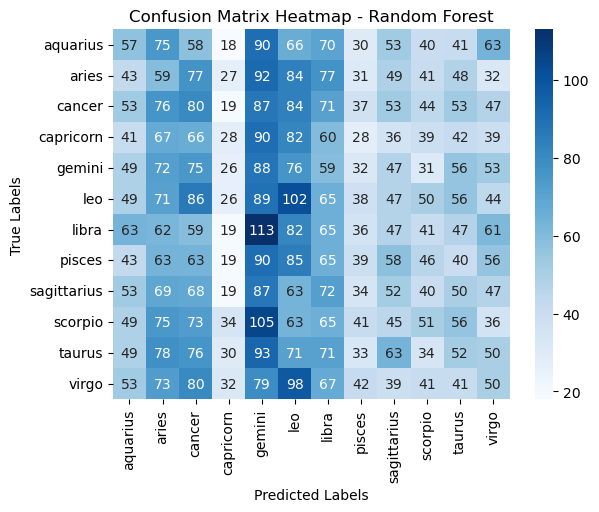

In [992]:
#plt.figure(figsize=(10, 8))

# Crear el mapa de calor
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)

# Añadir etiquetas y título
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Random Forest')
plt.show()
